In [1]:
# The needed libraries are imported.

import pandas as pd, pymysql, matplotlib.pyplot as plt, seaborn as sns, numpy as np, statistics

sns.set_style('darkgrid')

In [2]:
# Now the data is extracted.

with pymysql.connect(user='root', passwd='ningunaok12OK@', database='AmazonSales') as connection:
    fact = pd.read_sql("""SELECT * FROM Fact;""", connection)

    user = pd.read_sql("SELECT * FROM User;", connection)

    review = pd.read_sql("SELECT * FROM Review;", connection)

    product = pd.read_sql("SELECT * FROM Product;", connection)

    productCategory = pd.read_sql("SELECT * FROM ProductCategory;", connection)

C:\Users\roylo\AppData\Local\Temp\ipykernel_24180\363025810.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact = pd.read_sql("""SELECT * FROM Fact;""", connection)
C:\Users\roylo\AppData\Local\Temp\ipykernel_24180\363025810.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user = pd.read_sql("SELECT * FROM User;", connection)
C:\Users\roylo\AppData\Local\Temp\ipykernel_24180\363025810.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  review = pd.read_sql("SELECT * FROM Review;", connection)
C:\Users\roylo\AppData\

# **`Analysis Univariable`**

In [3]:
fact.head()

,SalesID,UserID,ProductID,Price,DiscountPercentage,PriceDiscounted,ReviewID
0,1,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,13.13,64%,4.77,R3HXWT0LRP0NMF
1,2,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,13.13,64%,4.77,R2AJM3LFTLZHFO
2,3,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,13.13,64%,4.77,R6AQJGUP6P86
3,4,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,13.13,64%,4.77,R1KD19VHEDV0OR
4,5,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,13.13,64%,4.77,R3C02RMYQMK6FC


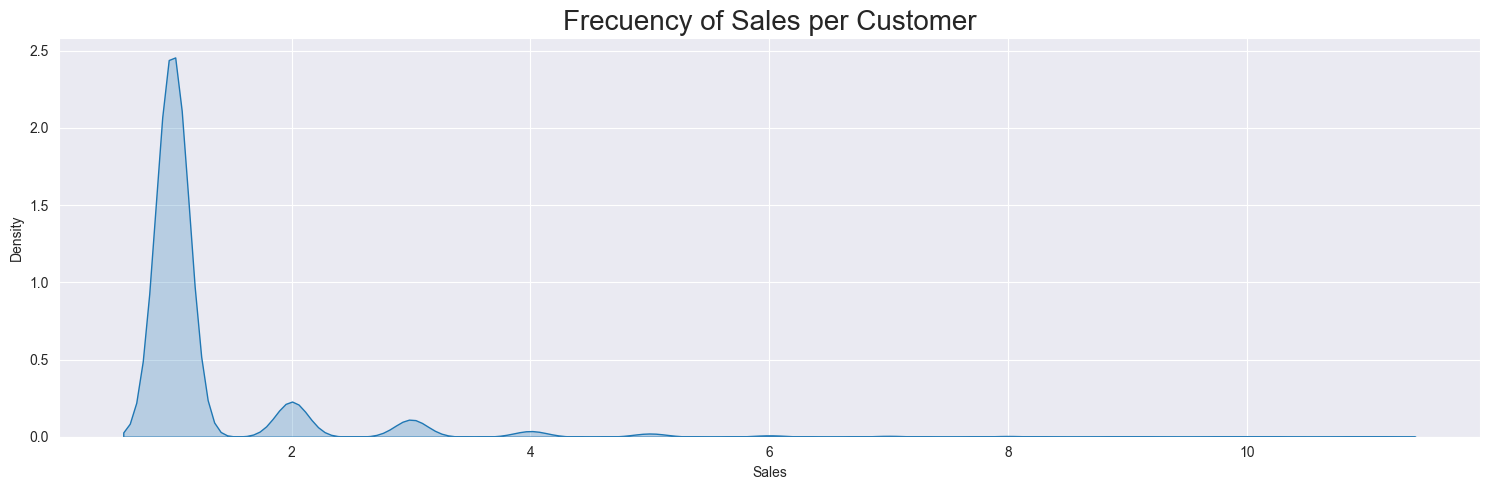

In [4]:
userCount = list(fact['UserID'].value_counts().to_dict().values())

plt.figure(figsize=(15,5))

sns.kdeplot(userCount, cbar=True, fill=True,)

plt.title("Frecuency of Sales per Customer", fontsize=20)
plt.ylabel("Density")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()

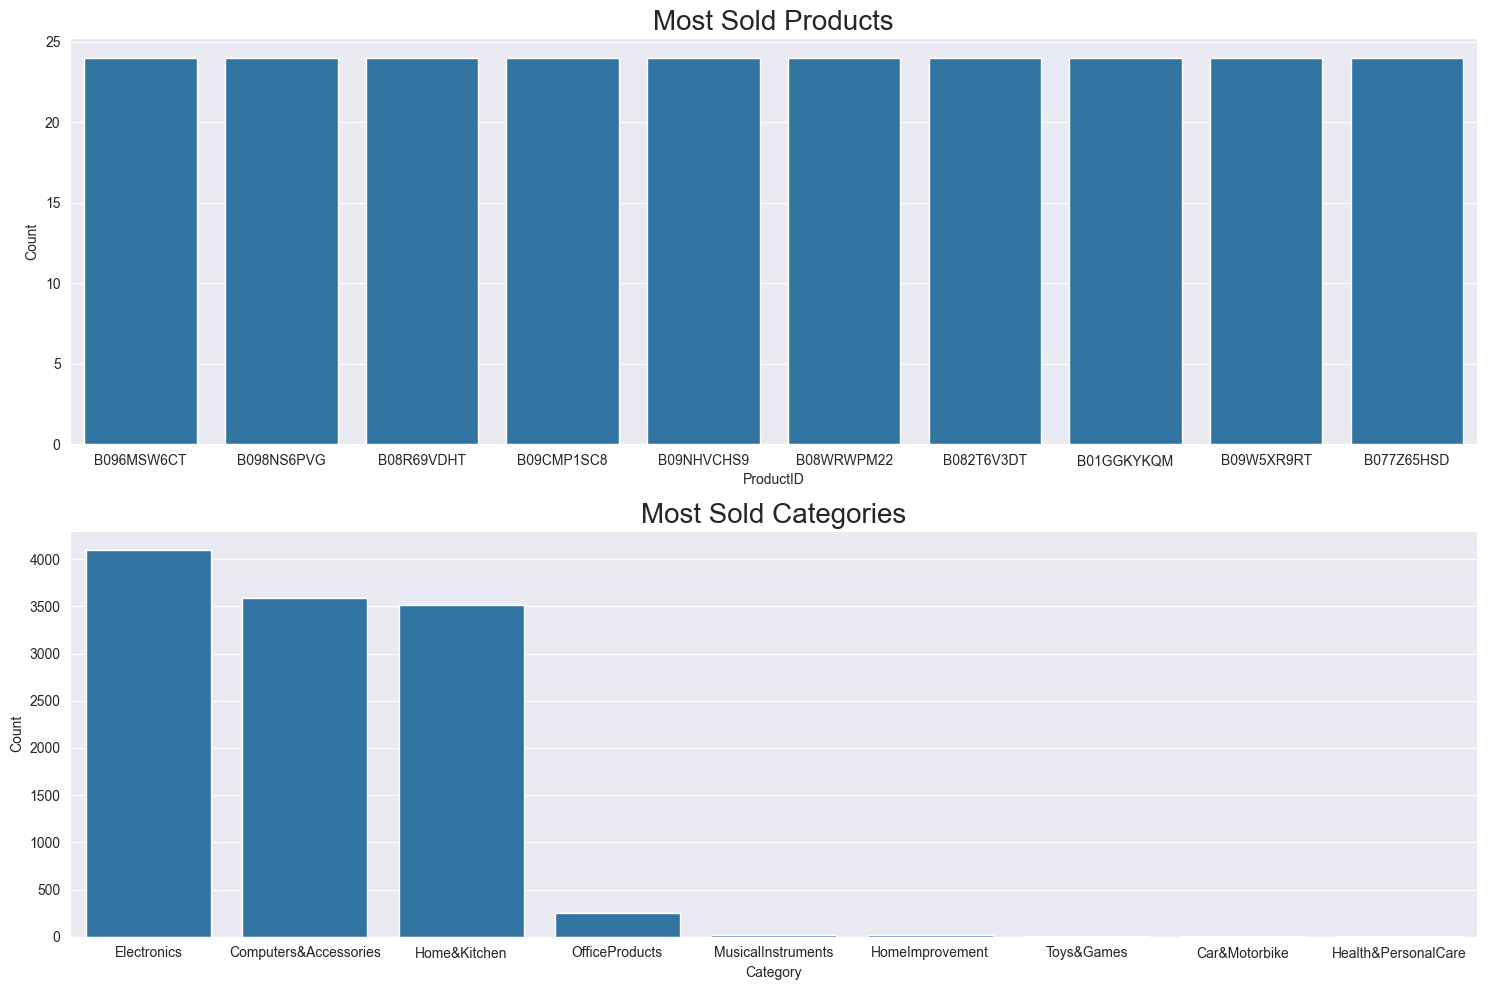

In [5]:
data = pd.merge(fact, pd.merge(product, productCategory), on='ProductID', how='left')[['ProductID','Category']]

productName = data['ProductID'].value_counts().to_dict()
category = data['Category'].value_counts().to_dict()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))

sns.barplot(x=list(productName.keys())[:10], y=list(productName.values())[:10], ax=ax1)
ax1.set_title("Most Sold Products", fontsize=20)
ax1.set_ylabel("Count")
ax1.set_xlabel("ProductID")

sns.barplot(data=category, ax=ax2)
ax2.set_title("Most Sold Categories", fontsize=20)
ax2.set_ylabel("Count")
ax2.set_xlabel("Category")

plt.tight_layout()
plt.show()

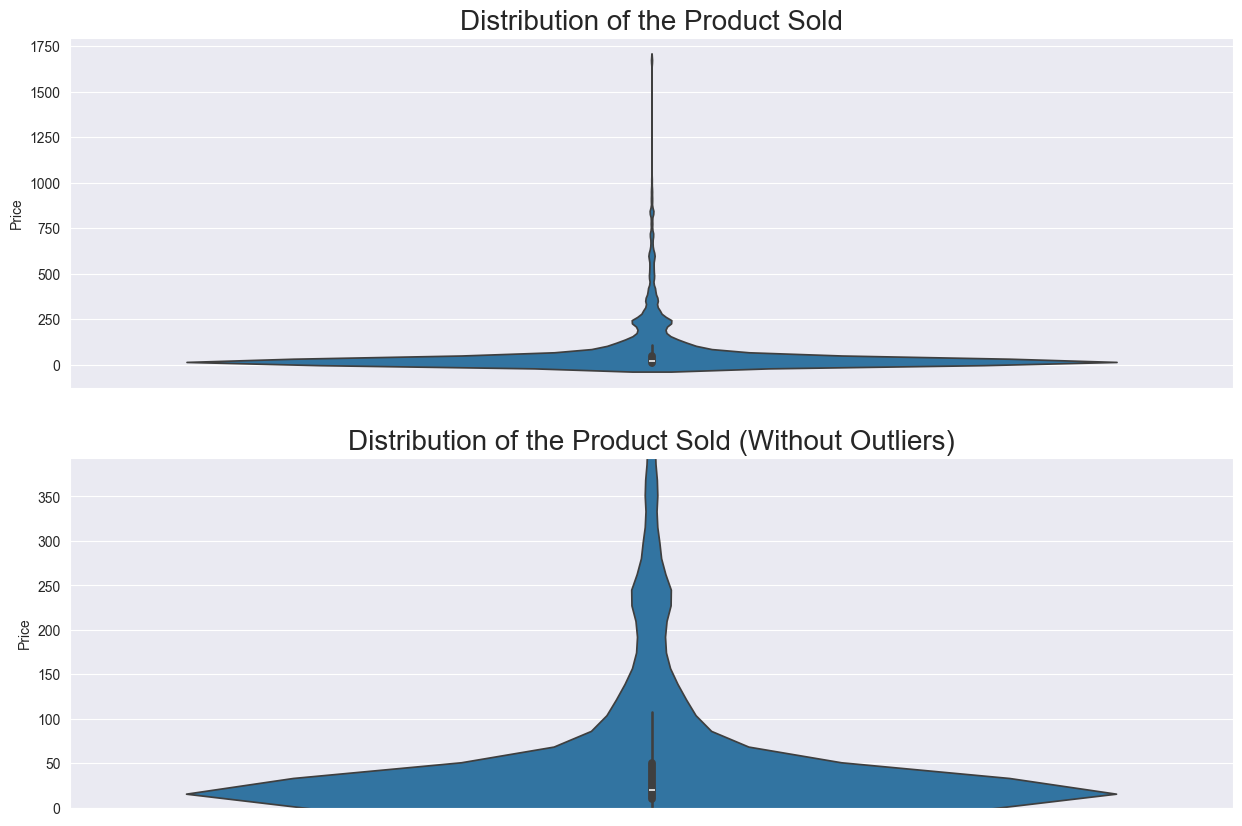

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))

sns.violinplot(fact['Price'], ax=ax1)
ax1.set_title("Distribution of the Product Sold", fontsize=20)

sns.violinplot(fact['Price'], ax=ax2)
ax2.set_ylim(0, np.median(fact['Price']) + (np.std(fact['Price']) * 3))
ax2.set_title("Distribution of the Product Sold (Without Outliers)", fontsize=20)

plt.show()

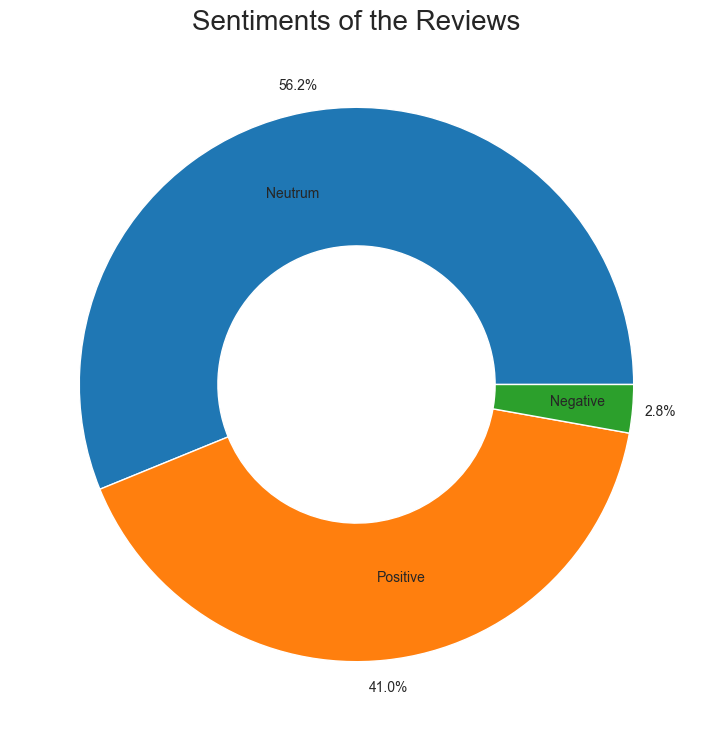

In [32]:
plt.figure(figsize=(9,9))

plt.pie(x=review['Sentiment'].value_counts(), labels=["Neutrum","Positive","Negative"], 
        wedgeprops=dict(width=0.5), autopct='%1.1f%%',  pctdistance=1.1, labeldistance=0.7)

plt.title("Sentiments of the Reviews", fontsize=20)
plt.show()